## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 7s 35ms/step - loss: 2.022

196/196 [==============================] - 7s 34ms/step - loss: 0.7208 - accuracy: 0.7405 - val_loss: 1.8189 - val_accuracy: 0.4935
Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________

Epoch 50/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2660 - accuracy: 0.5464 - val_loss: 1.5628 - val_accuracy: 0.4740
Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__

196/196 [==============================] - 7s 33ms/step - loss: 2.3041 - accuracy: 0.0982 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3037 - val_accuracy: 0.1000
Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dens

Epoch 49/50
196/196 [==============================] - 6s 33ms/step - loss: 2.3100 - accuracy: 0.1011 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 2.3090 - accuracy: 0.0989 - val_loss: 2.3088 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________


196/196 [==============================] - 7s 33ms/step - loss: 0.8349 - accuracy: 0.7052 - val_loss: 1.4597 - val_accuracy: 0.5139
Epoch 49/50
196/196 [==============================] - 6s 33ms/step - loss: 0.8229 - accuracy: 0.7107 - val_loss: 1.5631 - val_accuracy: 0.50860.8243 
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 0.8196 - accuracy: 0.7132 - val_loss: 1.4413 - val_accuracy: 0.5324
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

196/196 [==============================] - 6s 32ms/step - loss: 0.6452 - accuracy: 0.7698 - val_loss: 1.5465 - val_accuracy: 0.5347
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 0.6215 - accuracy: 0.7791 - val_loss: 1.5900 - val_accuracy: 0.5361
Epoch 49/50
196/196 [==============================] - 7s 35ms/step - loss: 0.6105 - accuracy: 0.7814 - val_loss: 1.6175 - val_accuracy: 0.5434
Epoch 50/50
196/196 [==============================] - 7s 35ms/step - loss: 0.5974 - accuracy: 0.7881 - val_loss: 1.5879 - val_accuracy: 0.5435
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________________________________________

Epoch 47/50
196/196 [==============================] - 7s 34ms/step - loss: 0.6844 - accuracy: 0.7521 - val_loss: 1.6648 - val_accuracy: 0.5321
Epoch 48/50
196/196 [==============================] - 7s 33ms/step - loss: 0.6573 - accuracy: 0.7637 - val_loss: 1.7008 - val_accuracy: 0.5156
Epoch 49/50
196/196 [==============================] - 7s 33ms/step - loss: 0.6483 - accuracy: 0.7655 - val_loss: 1.7039 - val_accuracy: 0.5202
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 0.6346 - accuracy: 0.7685 - val_loss: 1.7328 - val_accuracy: 0.5250
Experiment with LR = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__________________________________________

196/196 [==============================] - 7s 33ms/step - loss: 1.3553 - accuracy: 0.5240 - val_loss: 1.5755 - val_accuracy: 0.4638
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 1.3494 - accuracy: 0.5243 - val_loss: 1.5555 - val_accuracy: 0.4682
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 1.3047 - accuracy: 0.5388 - val_loss: 1.5638 - val_accuracy: 0.4746
Epoch 49/50
196/196 [==============================] - 7s 34ms/step - loss: 1.3162 - accuracy: 0.5351 - val_loss: 1.5657 - val_accuracy: 0.4752
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 1.3299 - accuracy: 0.5317 - val_loss: 1.5759 - val_accuracy: 0.4740
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________________________

Epoch 46/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4724 - accuracy: 0.4856 - val_loss: 1.5075 - val_accuracy: 0.4657
Epoch 47/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4673 - accuracy: 0.4874 - val_loss: 1.5005 - val_accuracy: 0.4684
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4624 - accuracy: 0.4884 - val_loss: 1.4972 - val_accuracy: 0.4730
Epoch 49/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4573 - accuracy: 0.4905 - val_loss: 1.4886 - val_accuracy: 0.4749
Epoch 50/50
196/196 [==============================] - 7s 33ms/step - loss: 1.4530 - accuracy: 0.4912 - val_loss: 1.4870 - val_accuracy: 0.4736
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________________

196/196 [==============================] - 7s 34ms/step - loss: 1.2073 - accuracy: 0.5757 - val_loss: 1.3512 - val_accuracy: 0.5217
Epoch 46/50
196/196 [==============================] - 7s 34ms/step - loss: 1.2049 - accuracy: 0.5774 - val_loss: 1.3904 - val_accuracy: 0.5053
Epoch 47/50
196/196 [==============================] - 6s 33ms/step - loss: 1.2000 - accuracy: 0.5783 - val_loss: 1.4028 - val_accuracy: 0.5045
Epoch 48/50
196/196 [==============================] - 6s 32ms/step - loss: 1.1967 - accuracy: 0.5801 - val_loss: 1.4528 - val_accuracy: 0.4923
Epoch 49/50
196/196 [==============================] - 6s 33ms/step - loss: 1.1846 - accuracy: 0.5844 - val_loss: 1.3623 - val_accuracy: 0.5177
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 1.1746 - accuracy: 0.5857 - val_loss: 1.3499 - val_accuracy: 0.5207
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 O

Epoch 45/50
196/196 [==============================] - 6s 33ms/step - loss: 1.0083 - accuracy: 0.6468 - val_loss: 1.3206 - val_accuracy: 0.5369
Epoch 46/50
196/196 [==============================] - 6s 33ms/step - loss: 0.9907 - accuracy: 0.6506 - val_loss: 1.3367 - val_accuracy: 0.5367
Epoch 47/50
196/196 [==============================] - 6s 33ms/step - loss: 0.9946 - accuracy: 0.6502 - val_loss: 1.3317 - val_accuracy: 0.5361
Epoch 48/50
196/196 [==============================] - 6s 33ms/step - loss: 0.9710 - accuracy: 0.6601 - val_loss: 1.3275 - val_accuracy: 0.5399
Epoch 49/50
196/196 [==============================] - 6s 33ms/step - loss: 0.9537 - accuracy: 0.6672 - val_loss: 1.3457 - val_accuracy: 0.5335
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 0.9552 - accuracy: 0.6639 - val_loss: 1.3555 - val_accuracy: 0.5364
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)      

196/196 [==============================] - 6s 33ms/step - loss: 0.8061 - accuracy: 0.7119 - val_loss: 1.4329 - val_accuracy: 0.5266
Epoch 45/50
196/196 [==============================] - 7s 34ms/step - loss: 0.8314 - accuracy: 0.7019 - val_loss: 1.4630 - val_accuracy: 0.5313
Epoch 46/50
196/196 [==============================] - 6s 33ms/step - loss: 0.7995 - accuracy: 0.7119 - val_loss: 1.4881 - val_accuracy: 0.5249
Epoch 47/50
196/196 [==============================] - 7s 35ms/step - loss: 0.7864 - accuracy: 0.7169 - val_loss: 1.4759 - val_accuracy: 0.5303
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 0.7481 - accuracy: 0.7302 - val_loss: 1.5316 - val_accuracy: 0.5368
Epoch 49/50
196/196 [==============================] - 7s 34ms/step - loss: 0.7455 - accuracy: 0.7317 - val_loss: 1.5329 - val_accuracy: 0.5319
Epoch 50/50
196/196 [==============================] - 6s 33ms/step - loss: 0.7335 - accuracy: 0.7379 - val_loss: 1.5349 - val_accuracy: 0.5307
Expe

196/196 [==============================] - 7s 35ms/step - loss: 1.8798 - accuracy: 0.3472 - val_loss: 1.8822 - val_accuracy: 0.3465
Epoch 44/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8757 - accuracy: 0.3476 - val_loss: 1.8779 - val_accuracy: 0.3488
Epoch 45/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8717 - accuracy: 0.3496 - val_loss: 1.8741 - val_accuracy: 0.3511 0s - loss: 1.8720 - accura
Epoch 46/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8679 - accuracy: 0.3506 - val_loss: 1.8705 - val_accuracy: 0.3500loss: 1.8686 - accuracy
Epoch 47/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8642 - accuracy: 0.3522 - val_loss: 1.8668 - val_accuracy: 0.3539
Epoch 48/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8605 - accuracy: 0.3534 - val_loss: 1.8635 - val_accuracy: 0.3537
Epoch 49/50
196/196 [==============================] - 6s 33ms/step - loss: 1.8570 - accuracy: 0.3

196/196 [==============================] - 9s 47ms/step - loss: 1.6987 - accuracy: 0.4081 - val_loss: 1.7020 - val_accuracy: 0.4068
Epoch 43/50
196/196 [==============================] - 9s 47ms/step - loss: 1.6951 - accuracy: 0.4088 - val_loss: 1.6978 - val_accuracy: 0.4062
Epoch 44/50
196/196 [==============================] - 8s 39ms/step - loss: 1.6906 - accuracy: 0.4109 - val_loss: 1.6939 - val_accuracy: 0.4096
Epoch 45/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6870 - accuracy: 0.4119 - val_loss: 1.6902 - val_accuracy: 0.4096
Epoch 46/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6836 - accuracy: 0.4127 - val_loss: 1.6862 - val_accuracy: 0.4140
Epoch 47/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6795 - accuracy: 0.4146 - val_loss: 1.6830 - val_accuracy: 0.4093
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 1.6757 - accuracy: 0.4152 - val_loss: 1.6806 - val_accuracy: 0.4143
Epoc

Epoch 42/50
196/196 [==============================] - 7s 33ms/step - loss: 1.5968 - accuracy: 0.4447 - val_loss: 1.6042 - val_accuracy: 0.4420
Epoch 43/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5920 - accuracy: 0.4460 - val_loss: 1.6047 - val_accuracy: 0.4398
Epoch 44/50
196/196 [==============================] - 10s 49ms/step - loss: 1.5872 - accuracy: 0.4487 - val_loss: 1.5950 - val_accuracy: 0.4419 ETA: 0s - loss: 1.5870 - accuracy: 0.
Epoch 45/50
196/196 [==============================] - 9s 48ms/step - loss: 1.5826 - accuracy: 0.4502 - val_loss: 1.5935 - val_accuracy: 0.4416
Epoch 46/50
196/196 [==============================] - 9s 46ms/step - loss: 1.5782 - accuracy: 0.4513 - val_loss: 1.5884 - val_accuracy: 0.4461 1s - l
Epoch 47/50
196/196 [==============================] - 7s 33ms/step - loss: 1.5743 - accuracy: 0.4532 - val_loss: 1.5844 - val_accuracy: 0.4446
Epoch 48/50
196/196 [==============================] - 7s 33ms/step - loss: 1.5690 - accur

196/196 [==============================] - 7s 34ms/step - loss: 1.2510 - accuracy: 0.5597 - val_loss: 1.3694 - val_accuracy: 0.5142
Epoch 42/50
196/196 [==============================] - 7s 35ms/step - loss: 1.2505 - accuracy: 0.5596 - val_loss: 1.3910 - val_accuracy: 0.5090
Epoch 43/50
196/196 [==============================] - 7s 34ms/step - loss: 1.2502 - accuracy: 0.5614 - val_loss: 1.3840 - val_accuracy: 0.5062
Epoch 44/50
196/196 [==============================] - 7s 34ms/step - loss: 1.2351 - accuracy: 0.5657 - val_loss: 1.3672 - val_accuracy: 0.5123
Epoch 45/50
196/196 [==============================] - 7s 33ms/step - loss: 1.2174 - accuracy: 0.5719 - val_loss: 1.3799 - val_accuracy: 0.5092
Epoch 46/50
196/196 [==============================] - 7s 33ms/step - loss: 1.2084 - accuracy: 0.5761 - val_loss: 1.3909 - val_accuracy: 0.5063
Epoch 47/50
196/196 [==============================] - 7s 34ms/step - loss: 1.2045 - accuracy: 0.5768 - val_loss: 1.3641 - val_accuracy: 0.5171
Epoc

Epoch 41/50
196/196 [==============================] - 7s 34ms/step - loss: 2.2098 - accuracy: 0.2064 - val_loss: 2.2097 - val_accuracy: 0.2100
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 2.2077 - accuracy: 0.2080 - val_loss: 2.2076 - val_accuracy: 0.2119
Epoch 43/50
196/196 [==============================] - 7s 34ms/step - loss: 2.2056 - accuracy: 0.2104 - val_loss: 2.2056 - val_accuracy: 0.2143
Epoch 44/50
196/196 [==============================] - 7s 34ms/step - loss: 2.2036 - accuracy: 0.2119 - val_loss: 2.2036 - val_accuracy: 0.2172
Epoch 45/50
196/196 [==============================] - 7s 34ms/step - loss: 2.2016 - accuracy: 0.2142 - val_loss: 2.2015 - val_accuracy: 0.2183
Epoch 46/50
196/196 [==============================] - 7s 34ms/step - loss: 2.1996 - accuracy: 0.2157 - val_loss: 2.1995 - val_accuracy: 0.2198
Epoch 47/50
196/196 [==============================] - 7s 34ms/step - loss: 2.1976 - accuracy: 0.2174 - val_loss: 2.1975 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 2.0783 - accuracy: 0.2787 - val_loss: 2.0801 - val_accuracy: 0.2685
Epoch 41/50
196/196 [==============================] - 6s 33ms/step - loss: 2.0747 - accuracy: 0.2800 - val_loss: 2.0766 - val_accuracy: 0.2709
Epoch 42/50
196/196 [==============================] - 6s 33ms/step - loss: 2.0711 - accuracy: 0.2817 - val_loss: 2.0731 - val_accuracy: 0.2728
Epoch 43/50
196/196 [==============================] - 6s 33ms/step - loss: 2.0676 - accuracy: 0.2825 - val_loss: 2.0696 - val_accuracy: 0.2743
Epoch 44/50
196/196 [==============================] - 6s 33ms/step - loss: 2.0641 - accuracy: 0.2836 - val_loss: 2.0662 - val_accuracy: 0.2758
Epoch 45/50
196/196 [==============================] - 7s 33ms/step - loss: 2.0606 - accuracy: 0.2851 - val_loss: 2.0628 - val_accuracy: 0.2769
Epoch 46/50
196/196 [==============================] - 7s 33ms/step - loss: 2.0572 - accuracy: 0.2869 - val_loss: 2.0594 - val_accuracy: 0.2775
Epoc

Epoch 40/50
196/196 [==============================] - 7s 33ms/step - loss: 1.9777 - accuracy: 0.3054 - val_loss: 1.9757 - val_accuracy: 0.3083
Epoch 41/50
196/196 [==============================] - 7s 33ms/step - loss: 1.9736 - accuracy: 0.3072 - val_loss: 1.9716 - val_accuracy: 0.3082
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 1.9696 - accuracy: 0.3086 - val_loss: 1.9677 - val_accuracy: 0.3099
Epoch 43/50
196/196 [==============================] - 7s 34ms/step - loss: 1.9657 - accuracy: 0.3101 - val_loss: 1.9639 - val_accuracy: 0.3119
Epoch 44/50
196/196 [==============================] - 7s 34ms/step - loss: 1.9619 - accuracy: 0.3119 - val_loss: 1.9601 - val_accuracy: 0.3121
Epoch 45/50
196/196 [==============================] - 7s 34ms/step - loss: 1.9582 - accuracy: 0.3134 - val_loss: 1.9564 - val_accuracy: 0.3142
Epoch 46/50
196/196 [==============================] - 6s 33ms/step - loss: 1.9545 - accuracy: 0.3150 - val_loss: 1.9529 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 1.7273 - accuracy: 0.3961 - val_loss: 1.7310 - val_accuracy: 0.3958
Epoch 40/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7237 - accuracy: 0.3968 - val_loss: 1.7276 - val_accuracy: 0.3955
Epoch 41/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7195 - accuracy: 0.3984 - val_loss: 1.7240 - val_accuracy: 0.3978
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7156 - accuracy: 0.4003 - val_loss: 1.7195 - val_accuracy: 0.3999
Epoch 43/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7117 - accuracy: 0.4027 - val_loss: 1.7167 - val_accuracy: 0.4005
Epoch 44/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7082 - accuracy: 0.4032 - val_loss: 1.7127 - val_accuracy: 0.4019
Epoch 45/50
196/196 [==============================] - 7s 34ms/step - loss: 1.7043 - accuracy: 0.4046 - val_loss: 1.7089 - val_accuracy: 0.4037
Epoc

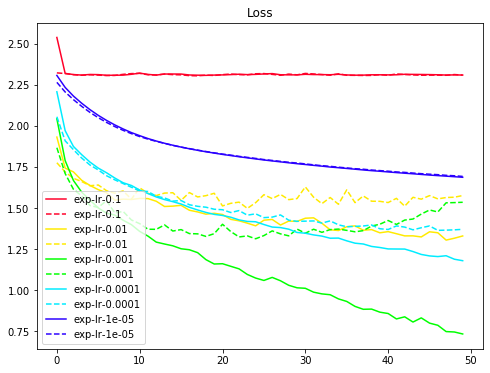

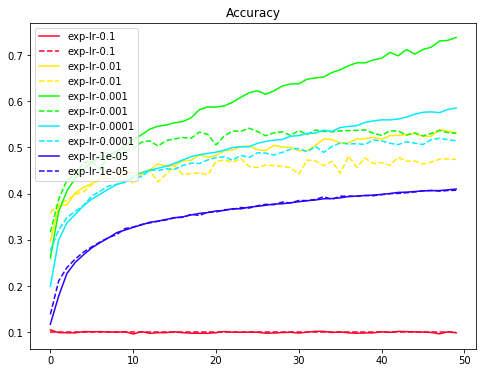

In [8]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()